In [1]:
import numpy as np
import pickle
import os

import sys
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import namedtuple

%matplotlib inline

In [2]:
src_folder = "E:/DevData/rehab_exercise/shoulder_surgery/data/"
with open(src_folder+'processed.pkl', "rb") as file:
    data = pickle.load(file)

In [18]:
def get_theta2(thetas):
    avg = np.mean(thetas)    
    ix = thetas>avg
    count = len(thetas)
    
    total = 0
    segs = 0
    
    
    above = 1000
    below = 1000
    s = 0
    for i in range(1, count):
        if thetas[i]>avg and thetas[i-1]<=avg:
            below = np.amax(thetas[s:i])            
            s = i
            if above<1000:
                total+= above-below
                segs+=1            
        
        if thetas[i]<=avg and thetas[i-1]>avg:
            above = np.amax(thetas[s:i])                        
            s = i
    
    return total/segs

#Generate Figure for separation line
ex_no = 3
hand = 0 #0:right hand, 1 left hand

for i in range(8):
    #if i!=6:
    #    continue
    
    d = data[i][hand]    
    a = data[i][2]
    if hand == 0:
        a = a[(a[:, 0]==ex_no) & (a[:, 1]!=2), :] 
    else:
        a = a[(a[:, 0]==ex_no) & (a[:, 1]>=2), :]
    
    fig = plt.figure(figsize=(10,5))
    subplot = fig.add_subplot(111)
    plt.ylim([-180, 180])
    plt.grid()
    
    for j in range(len(a)):
        #if j!=1:
        #    continue
            
        t1 = a[j, -2]
        t2 = a[j, -1]
        flex = a[j, -3]
        ds = d[(d[:, 0]>=t1) & (d[:,0]<=t2), :]
        
        t = ds[:, 0] - ds[0, 0]
        x = np.arccos(ds[:, -6])*180/np.pi
        y = np.arccos(ds[:, -5])*180/np.pi
        z = np.arccos(ds[:, -4])*180/np.pi
        
        subplot.plot(t, x)
        avgx = np.mean(x)
        #subplot.plot([0, t[-1]], [avgx, avgx], 'k--')
        
    plt.title('subject: '+str(i+1)+', Ex No: '+str(ex_no)+', Hand: '+str(hand)+', Flexibility: '+str(flex))
    plt.legend()
    plt.xlabel('Time (s)')
    plt.ylabel(r"$\Theta$ (degree)")


[[  6.68594935  15.23117706  25.41884027]
 [ 11.25119575   4.55819394  22.12646857]
 [  6.61636219  10.89918302  25.83245756]
 [  8.37368738   9.57751319  38.08044487]
 [  5.14695362  16.40236248  44.47365985]
 [  2.48994038  17.29118172  27.14449496]
 [  6.24720502  12.15111972  22.87788153]
 [ 31.47861576  17.43068215  26.00865825]]


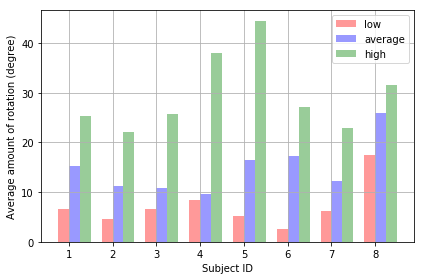

In [38]:
#Generate Figure for Right hand with respect to gravity
ex_no = 2
hand = 0 #0:right hand, 1 left hand

res = np.zeros((8,3))

for i in range(8):
    d = data[i][hand]    
    a = data[i][2]
    if hand == 0:
        a = a[(a[:, 0]==ex_no) & (a[:, 1]!=2), :] 
    else:
        a = a[(a[:, 0]==ex_no) & (a[:, 1]>=2), :]
    
    
    for j in range(3):
        t1 = a[j, -2]
        t2 = a[j, -1]
        flex = a[j, -3]
        ds = d[(d[:, 0]>=t1) & (d[:,0]<=t2), :]
        
        t = ds[:, 0] - ds[0, 0]
        x = np.arccos(ds[:, -6])*180/np.pi
        res[i, j] = get_theta2(x)
        
print(res)
temp = res[1, 0]
res[1, 0] = res[1, 1]
res[1, 1] = temp

temp = res[7, 0]
res[7, 0] = res[7, 1]
res[7, 1] = res[7, 2]
res[7, 2] = temp
#print(res)


n_groups = 8

fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.25
opacity = 0.4

rects1 = ax.bar(index, res[:, 0], bar_width,
                alpha=opacity, color='r',                
                label='low')

rects2 = ax.bar(index + bar_width, res[:, 1], bar_width,
                alpha=opacity, color='b',                
                label='average')

rects3 = ax.bar(index + 2*bar_width, res[:, 2], bar_width,
                alpha=opacity, color='g',                
                label='high')

ax.set_xlabel('Subject ID')
ax.set_ylabel("Average amount of rotation (degree)")
#ax.set_title('')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('1', '2', '3', '4', '5', '6', '7', '8'))
ax.legend()

plt.grid()
fig.tight_layout()
plt.show()        
res1 = res        

[[  2.11769119   1.91411662   4.08599894]
 [  6.47090503   5.11347256   6.02710528]
 [  2.30973864   1.62559946  15.12440877]
 [  2.16264817   5.062808     3.71542564]
 [  0.70851484   0.86711788   1.82181267]
 [  2.41606534   2.56519291   2.00690901]
 [  1.4180553    3.25583564   8.78141001]
 [  1.20100598   4.87695469   6.29977556]]


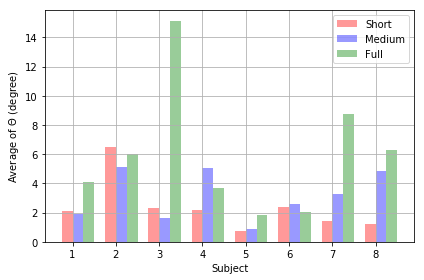

In [31]:
#Generate Figure for Left hand with respect to gravity
ex_no = 3
hand = 0 #0:right hand, 1 left hand

res = np.zeros((8,3))

for i in range(8):
    d = data[i][hand]    
    a = data[i][2]
    if hand == 0:
        a = a[(a[:, 0]==ex_no) & (a[:, 1]!=2), :] 
    else:
        a = a[(a[:, 0]==ex_no) & (a[:, 1]>=2), :]
    
    
    for j in range(3):
        t1 = a[j, -2]
        t2 = a[j, -1]
        flex = a[j, -3]
        ds = d[(d[:, 0]>=t1) & (d[:,0]<=t2), :]
        
        t = ds[:, 0] - ds[0, 0]
        x = np.arccos(ds[:, -3]*(-1))*180/np.pi
        res[i, j] = get_theta2(x)
        
print(res)

n_groups = 8

fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.25
opacity = 0.4

rects1 = ax.bar(index, res[:, 0], bar_width,
                alpha=opacity, color='r',                
                label='Short')

rects2 = ax.bar(index + bar_width, res[:, 1], bar_width,
                alpha=opacity, color='b',                
                label='Medium')

rects3 = ax.bar(index + 2*bar_width, res[:, 2], bar_width,
                alpha=opacity, color='g',                
                label='Full')

ax.set_xlabel('Subject')
ax.set_ylabel(r"Average of $\Theta$ (degree)")
#ax.set_title('')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('1', '2', '3', '4', '5', '6', '7', '8'))
ax.legend()

plt.grid()
fig.tight_layout()
plt.show()        
res2 = res        

In [ ]:
n_groups = 8

fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.4

rects1 = ax.bar(index, res1[:, 0], bar_width,
                alpha=opacity, color='r',                
                label='Right')

rects2 = ax.bar(index + bar_width, res2[:, 0], bar_width,
                alpha=opacity, color='b',                
                label='Left')


ax.set_xlabel('Subject')
ax.set_ylabel(r"Average of $\Theta$ (degree)")
#ax.set_title('')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('1', '2', '3', '4', '5', '6', '7', '8'))
ax.legend()

plt.grid()
fig.tight_layout()
plt.show()        